![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/Spark_NLP_Udemy_MOOC/Healthcare_NLP/DeIdentification.ipynb)

# **De-identification**

This notebook covers the different parameters and usages of `Deidentification`. This annotator provides the ability to obfuscate or mask the entities that contain personal information.

**📖 Learning Objectives:**

1. Background: Understand the Deidentification module

2. Colab setup

3. Become comfortable with `Deidentification` using the different parameters of the annotator.


**🔗 Helpful Links:**

- Documentation : [Deidentification](https://nlp.johnsnowlabs.com/docs/en/licensed_annotators#deidentification)

- Python Docs : [Deidentification](https://nlp.johnsnowlabs.com/licensed/api/python/reference/autosummary/sparknlp_jsl/annotator/deid/deIdentification/index.html#sparknlp_jsl.annotator.deid.deIdentification.DeIdentification)

- Scala Docs : [Deidentification](https://nlp.johnsnowlabs.com/licensed/api/com/johnsnowlabs/nlp/annotators/deid/DeIdentification.html)

- For extended examples of usage, see the [Spark NLP Workshop repository](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.Clinical_DeIdentification.ipynb).

## **📜 Background**


De-identification is a critical and important technology to facilitate the use of structured or unstructured clinical text while protecting patient privacy and confidentiality. John Snow Labs teams have invested great efforts in developing methods and corpora for de-identification of clinical text, PDF, image, and DICOM files containing Protected Health Information (PHI):

*   an individual’s past, present or future physical or mental health condition;
*   the provision of health care to the individual; and
*   the past, present, or future payments for health care.

PHI includes many common identifiers, such as name, address, birth date, and Social Security Number, when these can be associated with health information.

Spark NLP for Healthcare provides several techniques and strategies for de-identification, the principal ones include:


*   **Mask**:

          * entity_labels (default): masks each detected entity using its corresponding entity label (e.g., [NAME], [DATE], [LOCATION]).
          * same_length_chars: masks de-identified entities with the same number of asterisks (*) as the original token length, enclosed in brackets ([ ]).
          Example: John Doe → [******]
          * fixed_length_chars: Masks all de-identified entities with a fixed-length sequence of asterisks (*). The length can be configured using the setFixedMaskLength() method.
          Example (fixed length = 5): John Doe → [*****]


*   **Obfuscation**: replaces sensitive entities with random but realistic values of the same type. For example, a detected name might be replaced with another randomly generated name, or a date with another plausible date within a similar range. This approach preserves linguistic structure while protecting PHI.

*   **Faker**: uses a predefined set of synthetic (fake) entities stored in the internal Spark NLP memory (spark-nlp-internal).

* **Multi-Mode De-identification**: Spark NLP for Healthcare also supports an advanced multi-mode configuration, enabling multiple de-identification strategies to be applied simultaneously.

## **🎬 Colab Setup**

This module is licensed, so you need a valid license JSON file.



Installing johnsnowlabs:

In [ ]:
! pip install -q johnsnowlabs

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, medical

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars to the Spark Session JVM
nlp.install()

Starting spark session:

In [ ]:
import pandas as pd
import pyspark.sql.functions as F

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

In [5]:
spark

## **🖨️ Input/Output Annotation Types**

- Input: `DOCUMENT`, `CHUNK`, `TOKEN`

- Output: `DOCUMENT`

## **🔎 Parameters**


- `ageRanges`: (IntArrayParam)
List of integers specifying limits of the age groups to preserve during obfuscation

- `blackList`: (StringArrayParam)
List of entities that will be ignored to in the regex file.

- `consistentObfuscation`: (BooleanParam)
Whether to replace very similar entities in a document with the same randomized term (default: true) The similarity is based on the Levenshtein Distance between the words.

- `dateFormats`: (StringArrayParam)
Format of dates to displace

- `dateTag`: (Param[String])
Tag representing what are the NER entity (default: DATE)

- `dateToYear`: (BooleanParam)
true if dates must be converted to years, false otherwise

- `days`: (IntParam)
Number of days to obfuscate the dates by displacement.

- `fixedMaskLength`: (IntParam)
Select the fixed mask length: this is the length of the masking sequence that will be used when the 'fixed_length_chars' masking policy is selected.

- `ignoreRegex`: (BooleanParam)
Select if you want to use regex file loaded in the model.

- `isRandomDateDisplacement`: (BooleanParam)
Use a random displacement days in dates entities,that random number is based on the DeIdentificationParams.seed If true use random displacement days in dates entities,if false use the DeIdentificationParams.days The default value is false.

- `language`: (Param[String])
The language used to select the regex file and some faker entities.'en'(english),'de'(German), 'es'(Spanish), 'fr'(French) or 'ro'(Romanian)

- `mappingsColumn`: (Param[String])
This is the mapping column that will return the Annotations chunks with the fake entities

- `maskingPolicy`: (Param[String])
Select the masking policy:
same_length_chars: Replace the obfuscated entity with a masking sequence composed of asterisks and surrounding squared brackets, being the total length of the masking sequence of the same length as the original sequence. Example, Smith -> [***]. If the entity is less than 3 chars (like Jo, or 5), asterisks without brackets will be returned. entity_labels: Replace the values with the corresponding entity labels. fixed_length_chars: Replace the obfuscated entity with a masking sequence composed of a fixed number of asterisks.

- `minYear`: (IntParam)
Minimum year to use when converting date to year

- `mode`: (Param[String])
Mode for Anonymizer ['mask'|'obfuscate'] Given the following text

- `obfuscateDate`: (BooleanParam)
When mode=="obfuscate" whether to obfuscate dates or not.

- `obfuscateRefFile`: (Param[String])
File with the terms to be used for Obfuscation

- `obfuscateRefSource`: (Param[String])
The source of obfuscation of to obfuscate the entities.For dates entities doesnt apply tha method.

- `outputAsDocument`: (BooleanParam)
Whether to return all sentences joined into a single document

- `refFileFormat`: (Param[String])
Format of the reference file for Obfuscation the default value for that is "csv"

- `refSep`: (Param[String])
Separator character for the csv reference file for Obfuscation de default value is "#"

- `regexOverride`: (BooleanParam)
If is true prioritize the regex entities, if is false prioritize the ner.

- `regexPatternsDictionary`: (ExternalResourceParam)
dictionary with regular expression patterns that match some protected entity if the dictionary in not setting up we will use the default regex file.

- `region`: (Param[String])
 ‘eu’ for European Union, ‘us’ for the USA, Default: ‘eu’

- `returnEntityMappings`: (BooleanParam)
With this property you select if you want to return mapping column

- `sameEntityThreshold`: (DoubleParam)
Similarity threshold [0.0-1.0] to consider two appearances of an entity as the same (default: 0.9) For date entities this method doesn't apply.

- `sameLengthFormattedEntities`: (StringArrayParam)
List of formatted entities to generate the same length outputs as original ones during obfuscation.

- `seed`: (IntParam)
It is the seed to select the entities on obfuscate mode.With the seed you can reply a execution several times with the same ouptut.

- `selectiveObfuscationModesPath`: (Param[String])
Dictionary path where is the json that contains the selective obfuscation modes

- `unnormalizedDateMode`: (Param[String])
The mode to use if the date is not formatted.

- `zipCodeTag`: (Param[String])
Tag representing zip codes in the obfuscate reference file (default: ZIP).

- `entityCasingModes`: (Param[String]) Dictionary path where is the json that contains the entity casing modes.

- `GenderAwareness`: (BooleanParam) Set whether to use gender-aware names or not during obfuscation. This param effects only names. If value is true, it might decrease performance. Default: False

- `AgeRangesByHipaa`: (BooleanParam) Set whether to obfuscate ages based on HIPAA (Health Insurance Portability and Accountability Act) Privacy Rule.

- `RegexPatternsDictionaryAsJsonString`: (Param[JSON]) Sets dictionary with regular expression patterns as JSON that match some protected entity.

- `CombineRegexPatterns`: (BooleanParam) Sets whether you want to use regex both loaded regex file and default regex file.

- `MetadataMaskingPolicy`: (Param[String]) Sets metadata masking policy. The metadata includes the masked form of the document: ‘entity_labels’: Replace the values with the entity value. ‘same_length_chars’: Replace the name with the asterix with same length minus two plus brackets on both end.If the entity is less than 3 chars (like Jo, or 5), we can just use asterix without brackets.
 ‘fixed_length_chars’: Replace the obfuscated entity with a masking sequence composed of a fixed number of asterisk.

- `DoExceptionHandling`: (BooleanParam) If True, exceptions are handled. An error annotation is emitted which has the exception message. Processing continues with the next one. This comes with a performance penalty.

- `AgeGroups`: (Dict) Sets a dictionary of age groups to obfuscate ages. For this parameter to be active, the `obfuscateByAgeGroups` parameter must be true. If the given ageGroups do not fully contain the ages, the ages continue to be obfuscated according to the ageRanges parameter.

- `KeepYear`: (BooleanParam) Sets whether to keep the year intact when obfuscating date entities. If True, the year will remain unchanged during the obfuscation process. If False, the year will be modified along with the month and day.

- `AdditionalDateFormats`: (formats: list) Sets additional date formats to be considered during date obfuscation. This allows users to specify custom date formats in addition to the default date formats.

- `BlackListEntities`: (value) Sets a list of entities coming from NER or regex rules that will be ignored for masking or obfuscation. The rest entities will be processed. Default: []

- `ConsistentAcrossNameParts`: (BooleanParam) Sets whether to enforce consistent obfuscation across name parts, even when they appear separately. When set to True, the same transformation or obfuscation will be applied consistently to all parts of the same name entity, even if those parts appear separately.

- `CountryObfuscation`: (BooleanParam) Sets whether to obfuscate country entities or not. If True, country entities will be obfuscated. If False, country entities will not be obfuscated.

- `DateEntities`: (entities: list) Sets list of date entities. Default: [‘DATE’, ‘DOB’, ‘DOD’, ‘EFFDATE’, ‘FISCAL_YEAR’]

- `GeoConsistency`: (BooleanParam) Sets whether to enforce consistent obfuscation across geographical entities: state, city, street, zip and phone.

- `groupByCol` : The column name used to group the dataset. This parameter is used in conjunction with consistentObfuscation to ensure consistent obfuscation within each group. When groupByCol is set, the dataset is partitioned into groups based on the values of the specified column. Default: "" (empty string, meaning no grouping)

- `KeepMonth`: (BooleanParam) Sets whether to keep the month intact when obfuscating date entities. If True, the month will remain unchanged during the obfuscation process. If False, the month will be modified along with the year and day. Default: False.

- `KeepTextSizeForObfuscation``: (BooleanParam) It specifies whether the output should maintain the same character length as the input text. If True, the output text will remain the same if same length is available, else length might vary. If False, the output will be completely random. Default: False

- `MaxRandomDisplacementDays`: (days: int) Sets maximum number of days for random date displacement. Default is 1825.

- `ObfuscateZipByHipaa`: (BooleanParam) Sets whether to apply HIPAA Safe Harbor ZIP code obfuscation rules.

- `obfuscationEquivalents` : (equivalents) used to define variant-to-canonical mappings to ensure consistent obfuscation.
Each pair should contain three elements: variant, entity type, and canonical.
The pairs must have exactly 3 elements: [variant, entityType, canonical].

- `ObfuscationEquivalentsResource`: (path, read_as=ReadAs.TEXT, options=None) Allows loading obfuscation equivalents from an external file (e.g., CSV). Supports custom delimiter through the options parameter.

- `EnableDefaultObfuscationEquivalents`: (BooleanParam) Sets whether to enable default obfuscation equivalents for common entities. This parameter allows the system to automatically include a set of predefined common English name equivalents. Default is False.

- `StaticObfuscationPairs`: (pairs: list) Sets the static obfuscation pairs This method is used to set static obfuscation pairs that will be used for de-identification. Each pair should contain three elements: original, entity type, and fake. The pairs must have exactly 3 elements: [original, entityType, fake].

- `StaticObfuscationPairsResource`: (path, read_as=ReadAs.TEXT, options=None) Sets file with static obfuscation pairs The pairs must have exactly 3 elements: [original, entityType, fake]. The first element is the original value, the second is the entity type, and the third is the fake value. A delimiter is used to separate the elements in each line. You can specify the delimiter in the options parameter.

- `SameEntityThreshold`: (s) Sets similarity threshold [0.0-1.0] to consider two appearances of an entity as the same (default: 0.9).

- `UseShiftDays` (s): Sets if you want to use the random shift day when the document has this in its metadata. Default: False


We will cover the use of the most important params of the deidentification annotator below

### `setMode()`

The `setMode` parameter can be used to choose the mode for Anonymizer ['mask'|'obfuscate'] Given the following text.

#### **`Mask`** mode
we can set the policy using the param `setMaskingPolicy`.

In [6]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = nlp.NerConverter()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")

#deid model with "entity_labels"
deid_entity_labels= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels")

#deid model with "same_length_chars"
deid_same_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_same_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("same_length_chars")

#deid model with "fixed_length_chars"
deid_fixed_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_fixed_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("fixed_length_chars")\
    .setFixedMaskLength(4)


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deid_entity_labels,
      deid_same_length,
      deid_fixed_length])


empty_data = spark.createDataFrame([[""]]).toDF("text")
model_deid = deidPipeline.fit(empty_data)


#sample data
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR # 7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .
'''

result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
Approximate size to download 13.8 MB
[OK!]


Let's see the results of the different types of masking policies.

In [7]:
result.select(
    result.text.alias("text"),
    result.ner_chunk.result.alias("ner_chunk"),
    result.deid_entity_label.result.alias("deid_entity_label"),
    result.deid_same_length.result.alias("deid_same_length"),
    result.deid_fixed_length.result.alias("deid_fixed_length")
).show(truncate=50)

+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                                              text|                                         ner_chunk|                                 deid_entity_label|                                  deid_same_length|                                 deid_fixed_length|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|\nRecord date : 2093-01-13 , David Hale , M.D ....|[2093-01-13, David Hale, Hendrickson Ora, 71943...|[Record date : <DATE> , <NAME> , M.D ., , Name ...|[Record date : [********] , [********] , M.D .,...|[Record date : **** , **

#### **`Obfuscation`** mode

In the obfuscation mode, the annotator will replace sensetive entities with random values of the same type.

In [ ]:
obs_lines = """Marvin MARSHALL#PATIENT
Hubert GROGAN#PATIENT
ALTHEA COLBURN#PATIENT
Kalil AMIN#PATIENT
Inci FOUNTAIN#PATIENT
Ekaterina Rosa#DOCTOR
Rudiger Chao#DOCTOR
COLLETTE KOHLER#NAME
Mufi HIGGS#NAME"""

with open ('obfuscation.txt', 'w') as f:
  f.write(obs_lines)

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefFile('obfuscation.txt')\
    .setObfuscateRefSource("file")

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      obfuscation])


obfuscation_model = deidPipeline.fit(empty_data)


result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-01-14 , Mufi Higgs , M.D ."
1,", Name : Hendrickson Ora , MR # 7194334 Date :...",", Name : Collette Kohler , MR # 4861001 Date :..."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : Collette Kohler , 36 years-old , Record ..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","<LOCATION> , <LOCATION> , Phone 22-222-2222 ."


#### **`Faker`** mode

The faker module allows the user to use a set of fake entities that are in the memory of spark-nlp-internal. You can set up this module using the following property: `setObfuscateRefSource('faker')`.

If we select the `setObfuscateRefSource('both')` then we choose randomly the entities using the faker and the fakes entities from the obfuscateRefFile.


The entities that are allowed right now are the followings:

* Location
* Location-other
* Hospital
* City
* State
* Zip
* Country
* Contact
* Username
* Phone
* Fax
* Url
* Email
* Profession
* Name
* Doctor
* Patient
* Id
* Idnum
* Bioid
* Age
* Organization
* Healthplan
* Medicalrecord
* Ssn
* Passport
* DLN
* NPI
* C_card
* IBAN
* DEA
* Device




In [ ]:
faker = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      faker])

faker_model = deidPipeline.fit(empty_data)


result = faker_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-02-17 , Ebony Jean , M.D ."
1,", Name : Hendrickson Ora , MR # 7194334 Date :...",", Name : Jeffrie Mom , MR # 6405885 Date : 02/..."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : Britton , 38 years-old , Record date : 2..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","70 Butler Street , 629 South Plummer , Phone 2..."


### `setSelectiveObfuscationModes()`

We have multi-mode functionality in the `DeIdentification()`.

By providing a JSON file to the `setSelectiveObfuscationModes("a JSON path")` parameter, we are able to use multi-mode in de-identification. <br/>



Example JSON file can be like following:
```
{
	"obfuscate": ["PHONE"] ,
	"mask_entity_labels": ["ID"],
	"skip": ["DATE"],
	"mask_same_length_chars":["NAME"],
	"mask_fixed_length_chars":["zip", "location"]
}
```

Description of possible modes to enable multi-mode deidentification:

```
   * 'obfuscate': Replace the values with random values.
   * 'mask_same_length_chars': Replace the name with the minus two same lengths asterix, plus one bracket on both ends.
   * 'mask_entity_labels': Replace the values with the entity value.
   * 'mask_fixed_length_chars': Replace the name with the asterix with fixed length. You can also invoke "setFixedMaskLength()"
   * 'skip': Skip the entities (intact)
```

In [ ]:
#json to choose deid modes
sample_json= {
	"obfuscate": ["PHONE"] ,
	"mask_entity_labels": ["ID"],
	"skip": ["DATE"],
	"mask_same_length_chars":["NAME"],
	"mask_fixed_length_chars":["zip", "location"]
}

import json
with open('sample_multi-mode.json', 'w', encoding='utf-8') as f:
    json.dump(sample_json, f, ensure_ascii=False, indent=4)

deid_doc = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setSelectiveObfuscationModesPath("sample_multi-mode.json")


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deid_doc])

model_agerange = deidPipeline.fit(empty_data)

faker_model = deidPipeline.fit(empty_data)


result = faker_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-01-13 , [********] , M.D ."
1,", Name : Hendrickson Ora , MR # 7194334 Date :...",", Name : [*************] , MR # <ID> Date : 01..."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : [******] , <AGE> years-old , Record date..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","******* , ******* , Phone <CONTACT> ."


### setObfuscationEquivalents()

Sets variant-to-canonical entity mappings to ensure consistent obfuscation.

This function allows you to define equivalence rules for entity variants that should be obfuscated the same way. For example, the names “Alex” and “Alexander” will always be mapped to the same obfuscated value if they are linked to the same canonical form.

It accepts a list of string triplets, where each triplet defines:
variant: A non-standard, short, or alternative form of a value (e.g., “Alex”)

entityType: The type of the entity (e.g., “NAME”, “STATE”, “COUNTRY”)

canonical: The standardized form all variants map to (e.g., “Alexander”)

In [124]:
equivalents = [
    ["Alex Brown", "NAME", "Alexander Brown"],
    ["Rob McMaster", "NAME", "Robert McMaster"],
    ["CA", "LOCATION", "California"],
    ["Calif", "LOCATION", "California"]
]
obfuscation_equivalents = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("obfuscation_equivalents") \
    .setMode("obfuscate")\
    .setObfuscationEquivalents(equivalents)\
    .setEnableDefaultObfuscationEquivalents(False)

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      obfuscation_equivalents])

In [125]:
empty_data = spark.createDataFrame([[""]]).toDF("text")
model_deid = deidPipeline.fit(empty_data)
#sample data

text ='''
Record date: 01-10-2020. Alex Brown , M.D.
Name: Alexander Brown, MRN 7194334 Date: 01/14/95.
Blue Mountain Hospital 1095 Green Street, CA, USA. Phone 55-555-5555 .
Merry Mount Hospital 4596 Blue Street, Calif, USA. Phone 44-444-4444 .
'''
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))


We can see that Alexander Brown and Alex Brown where obfuscated with the same name, in this case, Celester Glow.

In [127]:
from pyspark.sql import functions as F

result.select(
    F.explode(
        F.arrays_zip(
            result.sentence.result,
            result.obfuscation_equivalents.result
        )
    ).alias("cols")
).select(
    F.expr("cols['0']").alias("sentence"),
    F.expr("cols['1']").alias("obfuscated")
).toPandas()


,sentence,obfuscated
0,Record date: 01-10-2020.,Record date: <DATE>.
1,"Alex Brown , M.D.","Celester Glow , M.D."
2,"Name: Alexander Brown, MRN 7194334 Date: 01/14...","Name: Celester Glow, MRN 2805665 Date: <DATE>."
3,"Blue Mountain Hospital 1095 Green Street, CA, ...","503 West Pine Street Alexandratown, 800 Kirnwo..."
4,Phone 55-555-5555 .,Phone 44-444-4444 .
5,"Merry Mount Hospital 4596 Blue Street, Calif, ...","1401 River Road 309 N 14th St, 16001 W NINE MI..."
6,Phone 44-444-4444 .,Phone 55-555-5555 .


### StaticObfuscationPairs()

Sets the static obfuscation pairs This method is used to set static obfuscation pairs that will be used for de-identification. Each pair should contain three elements: original, entity type, and fake. The pairs must have exactly 3 elements: [original, entityType, fake].

In [82]:
# Static pairs for direct replacement: [original, entity_type, fake_value]
static_pairs = [
    ["Alex Brown", "NAME", "Alexander Brown"],
    ["Rob McMaster", "NAME", "Robert McMaster"],
    ["CA", "LOCATION", "California"]
]

obfuscation_equivalents = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("obfuscation_equivalents") \
    .setMode("obfuscate")\
    .setStaticObfuscationPairs(static_pairs)

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      obfuscation_equivalents])

In [83]:
empty_data = spark.createDataFrame([[""]]).toDF("text")
model_deid = deidPipeline.fit(empty_data)
#sample data

text ='''
Record date: 01-10-2020. Alex Brown , M.D.
Name: Rob McMaster, MRN 7194334 Date: 01/14/95.
Record date: 2079-11-09. Blue Mountain Hospital 1095 Green Street, CA, USA. Phone 55-555-5555 .
'''
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))


We can see that Alex Brown and Rob McMaster were replaced for Alexander Brown and Robert McMaster; and CA for California.

In [85]:
from pyspark.sql import functions as F

result.select(
    F.explode(
        F.arrays_zip(
            result.sentence.result,
            result.obfuscation_equivalents.result
        )
    ).alias("cols")
).select(
    F.expr("cols['0']").alias("sentence"),
    F.expr("cols['1']").alias("obfuscated")
).toPandas()

,sentence,obfuscated
0,Record date: 01-10-2020.,Record date: <DATE>.
1,"Alex Brown , M.D.","Alexander Brown , M.D."
2,"Name: Rob McMaster, MRN 7194334 Date: 01/14/95.","Name: Robert McMaster, MRN 5972112 Date: <DATE>."
3,Record date: 2079-11-09.,Record date: <DATE>.
4,"Blue Mountain Hospital 1095 Green Street, CA, ...","411 Fortuyn Rd 1500 N Ritter Ave, California, ..."
5,Phone 55-555-5555 .,Phone 33-333-3333 .


## setGeoConsistency()

Sets whether to enforce consistent obfuscation across geographical entities: **state, city, street, zip and phone**.

### Functionality Overview
This parameter enables intelligent geographical entity obfuscation that maintains realistic relationships between different geographic components. When enabled, the system ensures that obfuscated addresses form coherent, valid combinations rather than random replacements.

### Supported Entity Types
The following geographical entities are processed with priority order:
- **state** (Priority: 0) - US state names
- **city** (Priority: 1) - City names
- **zip** (Priority: 2) - Zip codes
- **street** (Priority: 3) - Street addresses
- **phone** (Priority: 4) - Phone numbers

### Language Requirement
**IMPORTANT:** Geographic consistency is only applied when:
- `geoConsistency` parameter is set to `True` **AND**
- `language` parameter is set to `"en"`

For non-English configurations, this feature is automatically disabled regardless of the parameter setting.

We’ll use an NER model to extract the appropriate geographic entities.

In [28]:
labels = ["AGE", "CITY", "COUNTRY", "DATE", "DOCTOR", "HOSPITAL", "IDNUM", "ORGANIZATION",
          "PATIENT", "PHONE", "PROFESSION", "STATE", "STREET", "ZIP"]

pretrained_zero_shot_ner = medical.PretrainedZeroShotNER().pretrained("zeroshot_ner_deid_subentity_docwise_large", "en", "clinical/models")\
    .setInputCols("sentence", "token")\
    .setOutputCol("ner")\
    .setPredictionThreshold(0.5)\
    .setLabels(labels)

ner_converter = medical.NerConverterInternal()\
    .setInputCols("sentence", "token", "ner")\
    .setOutputCol("ner_chunk")

geo_consistency = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("geo_deidentified") \
    .setMode("obfuscate")\
    .setGeoConsistency(True)\
    .setLanguage("en")\

geo_deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      pretrained_zero_shot_ner,
      ner_converter,
      geo_consistency])

empty_data = spark.createDataFrame([[""]]).toDF("text")
geo_model = geo_deidPipeline.fit(empty_data)

# Sample data with geographic entities
geo_text = '''
Patient: John Smith, DOB: 05/15/1980
Address: 123 Main Street, Springfield, Illinois, 62701.
Phone: (217) 555-1234
Previous Address: 456 Oak Avenue, Chicago, Illinois, 60601.
Contact: (312) 555-5678
'''

geo_result = geo_model.transform(spark.createDataFrame([[geo_text]]).toDF("text"))

zeroshot_ner_deid_subentity_docwise_large download started this may take some time.
Approximate size to download 1.5 GB
[OK!]


Notice how the geographic entities are obfuscated consistently:
- All addresses from the same state use cities from that state
- ZIP codes match the obfuscated cities
- Phone numbers use area codes consistent with the geographic locations

In [29]:
geo_result.select(
    F.explode(F.arrays_zip(
        geo_result.sentence.result,
        geo_result.geo_deidentified.result
    )).alias("cols")
).select(
    F.expr("cols['0']").alias("original_sentence"),
    F.expr("cols['1']").alias("deidentified_sentence")
).show(truncate=False)

+---------------------------------------------------------------------------------------------+----------------------------------------------------------------------------+
|original_sentence                                                                            |deidentified_sentence                                                       |
+---------------------------------------------------------------------------------------------+----------------------------------------------------------------------------+
|Patient: John Smith, DOB: 05/15/1980\nAddress: 123 Main Street, Springfield, Illinois, 62701.|Patient: Fayrene Bors, DOB: <DATE>\nAddress: 100 Main St, Nashua, NH, 03060.|
|Phone: (217) 555-1234\nPrevious Address: 456 Oak Avenue, Chicago, Illinois, 60601.           |Phone: (603) 555-0181\nPrevious Address: 100 Main St, Nashua, NH, 03060.    |
|Contact: (312) 555-5678                                                                      |Contact: (603) 555-0181                 

### setAgeGroups()

This method, setAgeGroups, is used in conjunction with the obfuscateByAgeGroups parameter to specify age ranges for obfuscation.

In [ ]:
deid_ner_enriched = MedicalNerModel.pretrained("ner_deid_subentity_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_subentity")

ner_converter_enriched = NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner_subentity"]) \
    .setOutputCol("ner_subentity_chunk")\

obfuscation = DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateByAgeGroups(True)\
    .setAgeGroups({"baby": [0, 1],
                   "toddler": [1, 4],
                   "child": [4, 13],
                   "teenager": [13, 20],
                   "adult": [20, 65],
                   "senior": [65, 100] })

text ='''
Name: Joseph Brown, Age: 17, Phone: (9) 7765-5632.
This 17 yrs old male, presented with chest heaviness that started during a pick-up basketball game.
Mark Smith, aged 55, and his daughter (7) Mary were involved in an accident during their travel.
'''

pipeline = Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        deid_ner_enriched,
        ner_converter_enriched,
        obfuscation
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

obfuscation_model = pipeline.fit(empty_data)


result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

ner_deid_subentity_augmented download started this may take some time.
Approximate size to download 14.1 MB
[OK!]


,sentence,deidentified
0,"Name: Joseph Brown, Age: 17, Phone: (9) 7765-5632.","Name: Cleven Jasmine, Age: teenager, Phone: (6) 0074-4785."
1,"This 17 yrs old male, presented with chest heaviness that started during a pick-up basketball game.","This teenager yrs old male, presented with chest heaviness that started during a pick-up basketball game."
2,"Mark Smith, aged 55, and his daughter (7) Mary were involved in an accident during their travel.","Niki Jewell, aged adult, and his daughter (child) Mary were involved in an accident during their travel."


### `setAgeRanges()`

With this param, we can set a groups of age for obfuscation

In [ ]:
from pyspark.sql.types import StringType

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("obfuscation") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \
    .setAgeRanges([1, 4, 12, 20, 40, 60, 80])

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      obfuscation])

model_agerange = deidPipeline.fit(empty_data)

# Infant = 0-1 year.
# Toddler = 2-4 yrs.
# Child = 5-12 yrs.
# Teen = 13-19 yrs.
# Adult = 20-39 yrs.
# Middle Age Adult = 40-59 yrs.
# Senior Adult = 60+

dates = [
'1 year old baby',
'4 year old kids',
'A 15 year old female with',
'Record date: 2093-01-13, Age: 25',
'Patient is 45 years-old',
'He is 65 years-old male'
]
df_dates = spark.createDataFrame(dates,StringType()).toDF('text')


result = model_agerange.transform(df_dates)

result_df = result.select("text",F.explode(F.arrays_zip(result.ner_chunk.result,
                                                        result.obfuscation.result)).alias("cols")) \
                  .select("text",F.expr("cols['0']").alias("ner_chunk"),
                                 F.expr("cols['1']").alias("obfuscation"))

result_df.show(truncate=False)

+--------------------------------+----------+--------------------------------+
|text                            |ner_chunk |obfuscation                     |
+--------------------------------+----------+--------------------------------+
|1 year old baby                 |1         |2 year old baby                 |
|4 year old kids                 |4         |7 year old kids                 |
|A 15 year old female with       |15        |A 18 year old female with       |
|Record date: 2093-01-13, Age: 25|2093-01-13|Record date: 2093-01-30, Age: 31|
|Record date: 2093-01-13, Age: 25|25        |null                            |
|Patient is 45 years-old         |45        |Patient is 50 years-old         |
|He is 65 years-old male         |65        |He is 69 years-old male         |
+--------------------------------+----------+--------------------------------+



### `setDays()`

Using this param, we can specify how many days to shift the dates in order to obfuscate them.

In [ ]:
obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("obfuscation") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \
    .setDays(5)

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      obfuscation])

model_days_shift = deidPipeline.fit(empty_data)

dates = [
'Record date 1: 2093-01-13',
'Record date 2: 2021-09-22'

]

df_dates = spark.createDataFrame(dates,StringType()).toDF('text')

result = model_days_shift.transform(df_dates)


result_df = result.select("text",F.explode(F.arrays_zip(result.ner_chunk.result,
                                                        result.obfuscation.result)).alias("cols")) \
                  .select("text",F.expr("cols['0']").alias("ner_chunk"),
                                 F.expr("cols['1']").alias("obfuscation"))

result_df.show(truncate=False)

+-------------------------+----------+-------------------------+
|text                     |ner_chunk |obfuscation              |
+-------------------------+----------+-------------------------+
|Record date 1: 2093-01-13|2093-01-13|Record date 1: 2093-01-18|
|Record date 2: 2021-09-22|2021-09-22|Record date 2: 2021-09-27|
+-------------------------+----------+-------------------------+



### `setUnnormalizedDateMode()`


### Masking Unnormalized Date Formats

`setUnnormalizedDateMode()` parameter is used to mask the DATE entities that can not be normalized. In the example below, please check `03Apr2022` which couldn't be normalized and it is masked in the output.

- `setUnnormalizedDateMode(mask)` parameter is used to mask the DATE entities that can not be normalized.
- `setUnnormalizedDateMode(obfuscate)` parameter is used to obfuscate the DATE entities that can not be normalized.

In [ ]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A001', 'A002', 'A002'],
     'text' : ['Chris Brown was discharged on 10/02/2022',
               'Mark White was discharged on 02/28/2020',
               'John was discharged on 03 Apr2022',          # check this
               'John Moore was discharged on 12/31/2022'
              ],
     'dateshift' : ['-5', '-2', '10', '20']
    }
)

my_input_df = spark.createDataFrame(data)

de_identification_mask = DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text_mask") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')\
    .setUnnormalizedDateMode("mask")

de_identification_obf = DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text_obs") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')\
    .setUnnormalizedDateMode("obfuscation")

pipeline = Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification_mask,
    de_identification_obf
])

output = pipeline.fit(my_input_df).transform(my_input_df)

output.select('text', 'dateshift', 'deid_text_mask.result','deid_text_obs.result').show(truncate = False)

+----------------------------------------+---------+---------------------------------------------+----------------------------------------------+
|text                                    |dateshift|result                                       |result                                        |
+----------------------------------------+---------+---------------------------------------------+----------------------------------------------+
|Chris Brown was discharged on 10/02/2022|-5       |[Marshel Side was discharged on 09/27/2022]  |[Asenath Downs was discharged on 09/27/2022]  |
|Mark White was discharged on 02/28/2020 |-2       |[Ferrel Leghorn was discharged on 02/26/2020]|[Lorice Cho was discharged on 02/26/2020]     |
|John was discharged on 03 Apr2022       |10       |[Clydia was discharged on 13/Apr/2022]       |[Felizardo was discharged on 13/Apr/2022]     |
|John Moore was discharged on 12/31/2022 |20       |[Clydia Slough was discharged on 01/20/2023] |[Felizardo Makua was disch

### `setDateFormats()`


With this parameter, we can set a list of date formats that should be automatically recognized and displaced if successfully parsed.
In the example below, we will take two dates format: "MM/dd/yy" and "yyyy-MM-dd".

In [ ]:
deid = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setDateFormats(["MM/dd/yy","yyyy-MM-dd"]) \
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deid])

data = spark.createDataFrame([["# 7194334 Date : 01/13/93 PCP : Oliveira , 25 years-old , Record date : 2079-11-09."]]).toDF("text")

result = deidPipeline.fit(data).transform(data)
result.select("deidentified.result").show(truncate = False)

+------------------------------------------------------------------------------------+
|result                                                                              |
+------------------------------------------------------------------------------------+
|[# 6249009 Date : 03/01/93 PCP : Lestine , 26 years-old , Record date : 2079-12-26.]|
+------------------------------------------------------------------------------------+



 # Structured Deidentification for Relational Database

Let's install the MYSQL server dependencies

In [ ]:
!apt-get update -y -q
!apt-get install -y -q mysql-server
!pip install -q pyspark pymysql

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists...
Building dependency tree...
Reading state informat

Now let's start the mysql service

In [ ]:
!service mysql start

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


Define the SQL commands to reset the root password


In [ ]:
reset_password_sql = """
ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root';
FLUSH PRIVILEGES;
"""

# Write the SQL commands to a file
with open("reset_password.sql", "w") as file:
    file.write(reset_password_sql)

Let's restart the MySQL service to take effect

In [ ]:
!service mysql stop
# Start MySQL with the init file in the background
import time

!nohup mysqld --init-file=/content/reset_password.sql > mysql_init.log 2>&1 &
time.sleep(10)

 * Stopping MySQL database server mysqld
   ...done.


In [ ]:
# Remove the init file
!rm /content/reset_password.sql
# Create the /nonexistent directory
!mkdir /nonexistent
!service mysql start

 * Starting MySQL database server mysqld
   ...done.


Now, we will create a clinical database to be deidentified, called `healthcare_db` with two tables: patients and appointments with a relational join between them:


In [ ]:
# Create the healthcare database
!mysql -u root -proot -e "CREATE DATABASE healthcare_db;"

# Create the patients table
!mysql -u root -proot -e "USE healthcare_db; CREATE TABLE patients ( \
    patient_id INT AUTO_INCREMENT PRIMARY KEY, \
    name VARCHAR(255) NOT NULL, \
    address TEXT, \
    ssn CHAR(11) UNIQUE NOT NULL, \
    email VARCHAR(255) UNIQUE NOT NULL, \
    dob DATE NOT NULL, \
    age INT NOT NULL \
);"

# Create the appointments table with a foreign key reference to patients
!mysql -u root -proot -e "USE healthcare_db; CREATE TABLE appointments ( \
    appointment_id INT AUTO_INCREMENT PRIMARY KEY, \
    patient_id INT NOT NULL, \
    doctor_name VARCHAR(255) NOT NULL, \
    appointment_date DATE NOT NULL, \
    reason TEXT, \
    FOREIGN KEY (patient_id) REFERENCES patients(patient_id) \
    ON DELETE CASCADE ON UPDATE CASCADE \
);"

# Insert fake data into the patients table
!mysql -u root -proot -e "USE healthcare_db; INSERT INTO patients (name, address, ssn, email, dob, age) VALUES \
    ('John Doe', '123 Main St, Springfield', '123-45-6789', 'john.doe@example.com', '1985-04-15', 38), \
    ('Jane Smith', '456 Elm St, Shelbyville', '987-65-4321', 'jane.smith@example.com', '1990-07-20', 33);"

# Insert fake data into the appointments table
!mysql -u root -proot -e "USE healthcare_db; INSERT INTO appointments (patient_id, doctor_name, appointment_date, reason) VALUES \
    (1, 'Dr. Emily Carter', '2024-01-15', 'Annual Checkup'), \
    (2, 'Dr. Sarah Johnson', '2024-02-10', 'Flu Symptoms'), \
    (1, 'Dr. Emily Carter', '2024-02-15', 'Follow-up Visit'), \
    (1, 'Dr. James Wilson', '2024-03-20', 'Routine Blood Test');"

mysql: [Warning] Using a password on the command line interface can be insecure.
mysql: [Warning] Using a password on the command line interface can be insecure.
mysql: [Warning] Using a password on the command line interface can be insecure.
mysql: [Warning] Using a password on the command line interface can be insecure.
mysql: [Warning] Using a password on the command line interface can be insecure.


Reading the relational database as spark df for further processing:

In [ ]:
jdbc_url = "jdbc:mysql://localhost:3306/healthcare_db"
df = spark.read.format("jdbc").options(
    url=jdbc_url,
    driver="com.mysql.cj.jdbc.Driver",
    dbtable="appointments",
    user="root",
    password="root"
).load()

df.show()

+--------------+----------+-----------------+----------------+------------------+
|appointment_id|patient_id|      doctor_name|appointment_date|            reason|
+--------------+----------+-----------------+----------------+------------------+
|             1|         1| Dr. Emily Carter|      2024-01-15|    Annual Checkup|
|             2|         2|Dr. Sarah Johnson|      2024-02-10|      Flu Symptoms|
|             3|         1| Dr. Emily Carter|      2024-02-15|   Follow-up Visit|
|             4|         1| Dr. James Wilson|      2024-03-20|Routine Blood Test|
+--------------+----------+-----------------+----------------+------------------+



Now, let's import the database_deidentification utility module then setup the relational database deidentification options

In [ ]:
from sparknlp_jsl.utils.database_deidentification import *

In [ ]:
config = {
    "db_config": {
        "host": "localhost",
        "user": "root",
        "password": "root",
        "database": "healthcare_db"
    },
    "deid_options": {
        "days_to_shift": 10,
        "age_groups": {
            "child": (0, 12),
            "teen": (13, 19),
            "adult": (20, 64),
            "senior": (65, 90)
        },
        "pk_fk_shift_value": 100,
        "use_hipaa": False,
        "output_path": "deidentified_output/"
    },
    "logging": {
        "level": "INFO",
        "file": "deidentification.log"
    }
}

Performing the structured deidentification for the clinical relational database and showing the results

In [ ]:
deidentifier = RelationalDBDeidentification(spark, config)
deidentifier.deidentify()

Original table: appointments
+--------------+----------+-----------------+----------------+------------------+
|appointment_id|patient_id|doctor_name      |appointment_date|reason            |
+--------------+----------+-----------------+----------------+------------------+
|1             |1         |Dr. Emily Carter |2024-01-15      |Annual Checkup    |
|2             |2         |Dr. Sarah Johnson|2024-02-10      |Flu Symptoms      |
|3             |1         |Dr. Emily Carter |2024-02-15      |Follow-up Visit   |
|4             |1         |Dr. James Wilson |2024-03-20      |Routine Blood Test|
+--------------+----------+-----------------+----------------+------------------+

De-identified table: appointments
+--------------+----------+-----------+----------------+------------------+
|appointment_id|patient_id|doctor_name|appointment_date|reason            |
+--------------+----------+-----------+----------------+------------------+
|101           |101       |*****      |2024-01-25   

**De-identifying Sensitive Data in Relational Databases with a Few Lines of    Codes**


- **End-to-End De-Identification**
  - `deidentify()` automates the full flow:
    - Fetch tables
    - Extract schema information
    - Detect sensitive columns
    - Apply obfuscation and masking
    - Export de-identified data as CSV files

- **Database Connectivity**
  - `connect_to_db()`: Establish a connection to the MySQL database
  - `get_all_tables()`: Retrieve all table names from the connected database

- **Schema and Data Processing**
  - `get_schema_info(table_name)`: Extract schema details (date columns, primary keys, foreign keys) for a given table

- **Data Obfuscation**
  - `obfuscate_dates(df, date_columns)`: Shift dates by a configured number of days
  - `obfuscate_ages(df, age_columns, use_hipaa)`: Obfuscate ages using HIPAA rules or predefined age groups
  - `mask_other_sensitive_columns(df, other_columns)`: Mask sensitive columns (e.g., replace values with asterisks)

This class provides a complete framework for protecting sensitive information while maintaining data integrity in relational databases.

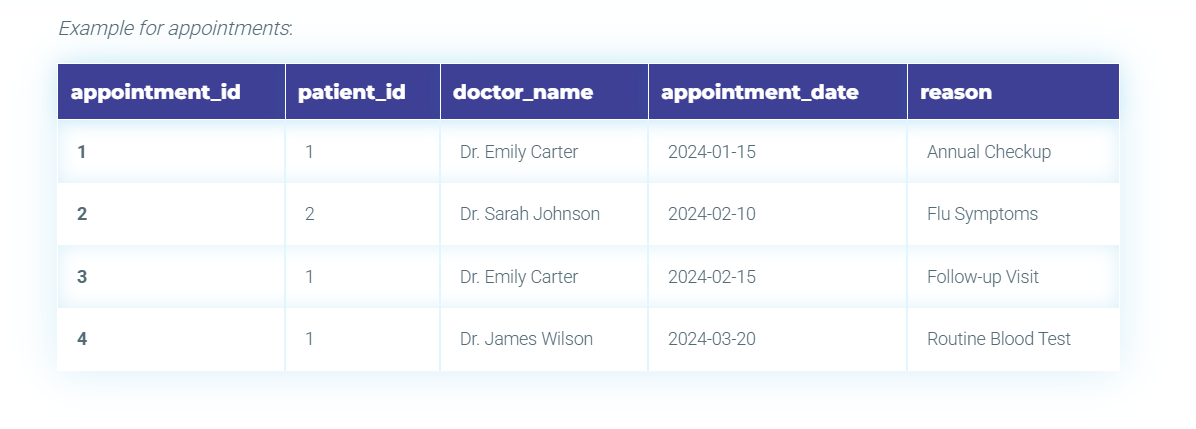

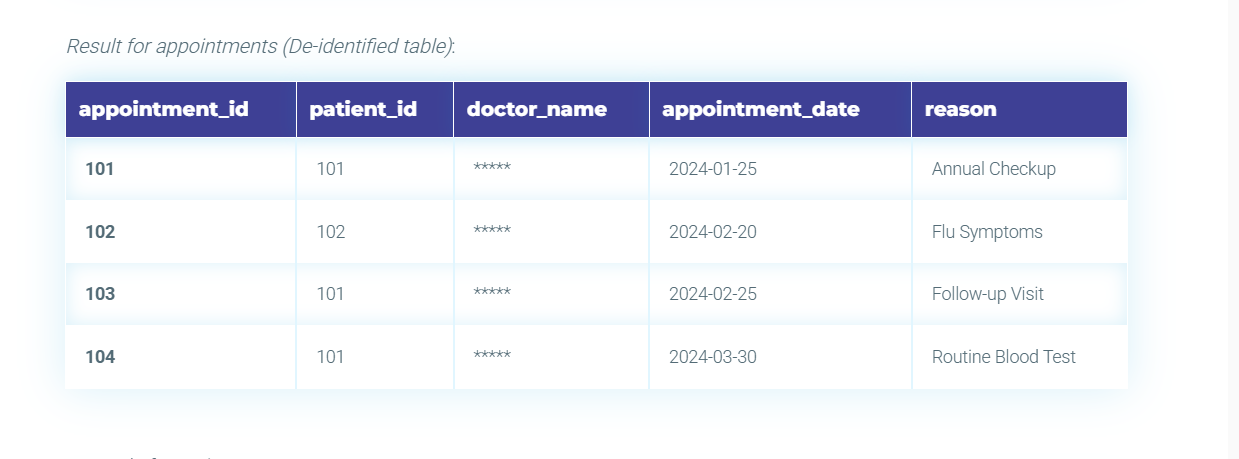

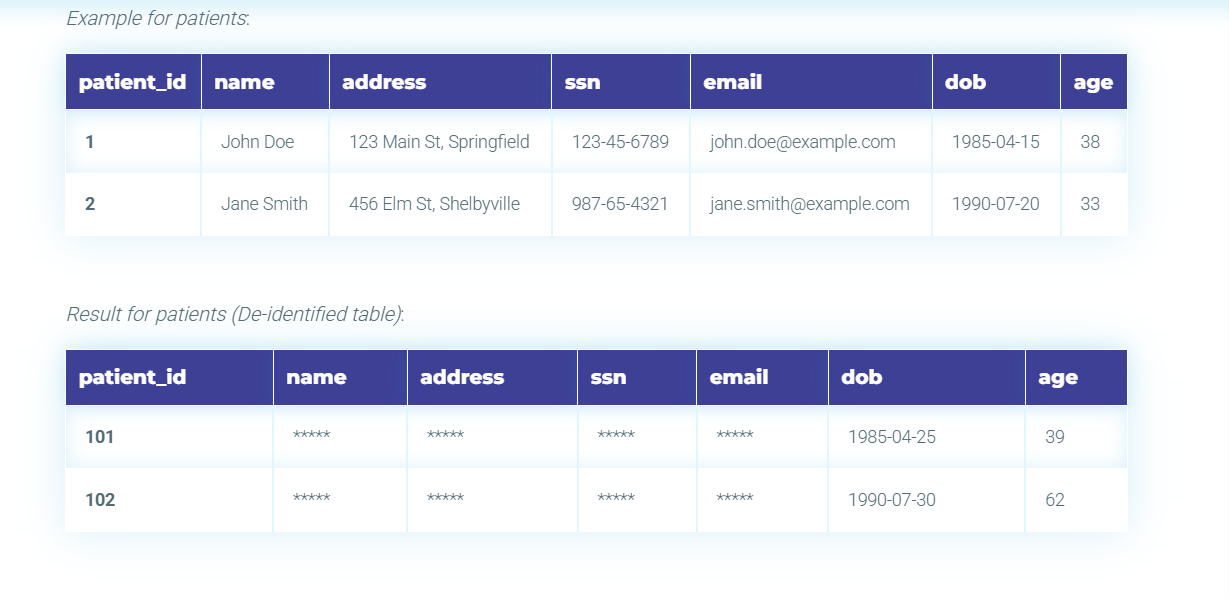